In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
os.sys.path.append("C:\\Users\\mplitt\\s2p_processing")
import utilities as u
import preprocessing as pp
import single_session_plots as ssp
import numpy as np
import SimilarityMatrixAnalysis as sm
import PlaceCellAnalysis as pc
import scipy as sp
import matplotlib.pyplot as plt
import suite2p as s2p
import s2p_preprocessing as s2p_pp
import h5py

%load_ext autoreload
%autoreload 2


In [7]:
greendir = os.path.join("E:\\","980_1100_calibration","980")
greenfile = os.path.join(greendir,"980_000_001")

In [8]:
info = s2p_pp.loadmat(greenfile+'.mat')

In [5]:
for k,v in info.items():
    print(k,v)

resfreq 7916
postTriggerSamples 5000
recordsPerBuffer 512
bytesPerBuffer 10240000
channels 2
ballmotion []
abort_bit 0
scanbox_version 2
scanmode 1
config {'wavelength': 980, 'frames': 1000, 'lines': 512, 'magnification': 1, 'magnification_list': array(['1.0', '1.2', '1.4', '1.7', '2.0', '2.4', '2.8', '3.4', '4.0',
       '4.8', '5.7', '6.7', '8.0'], dtype='<U3'), 'pmt0_gain': 0.64, 'pmt1_gain': 0, 'knobby': {'pos': {'x': 0, 'y': 0, 'z': 0, 'a': 10}, 'schedule': array([[  0,   0,  10,   0,  30],
       [  0,   0,  10,   0,  60],
       [  0,   0,  10,   0,  90],
       [  0,   0,  10,   0, 120],
       [  0,   0,  10,   0, 150],
       [  0,   0,  10,   0, 180]], dtype=uint8)}}
sz [512 796]
otwave []
otwave_um []
otparam []
otwavestyle 1
volscan 0
power_depth_link 0
opto2pow []
area_line 1
calibration [<scipy.io.matlab.mio5_params.mat_struct object at 0x000001B4D16F0E80>
objective Nikon 16x/0.8w/WD3.0
messages []
usernotes []
nChan 1
max_idx 999
frame_rate 15.4609375


In [9]:
greendat = s2p_pp.sbxread(greenfile)

815104 999
0


In [10]:
print(greendat.shape)

(1, 796, 512, 999)


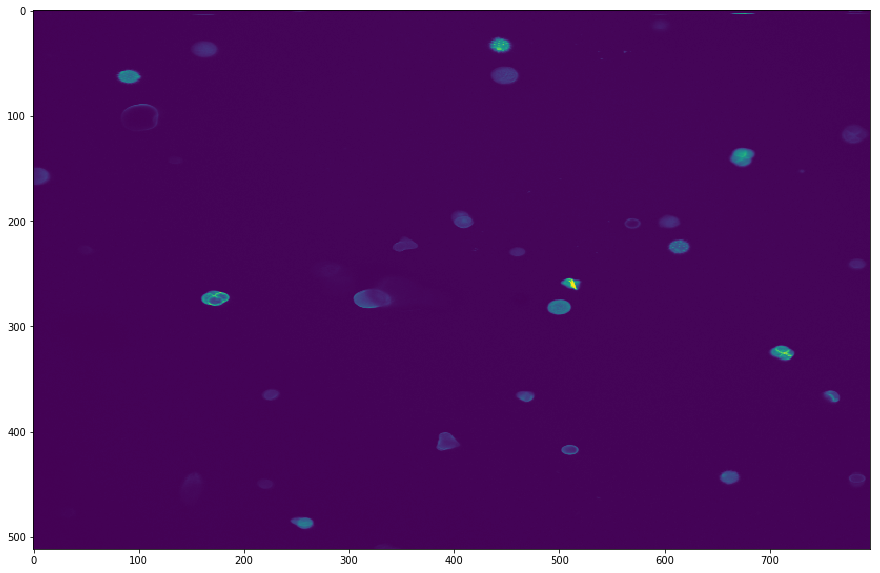

In [13]:
f,ax = plt.subplots(figsize=[15,10])
ax.imshow(np.squeeze(greendat.mean(axis=-1)).T)

In [23]:
reddir = os.path.join("E:\\","980_1100_calibration","1100")
redfile = os.path.join(reddir,"1100_000_003")

In [24]:
info = s2p_pp.loadmat(redfile+".mat")

In [25]:
for k,v in info.items():
    print(k,v)

resfreq 7916
postTriggerSamples 5000
recordsPerBuffer 512
bytesPerBuffer 10240000
channels 2
ballmotion []
abort_bit 0
scanbox_version 2
scanmode 1
config {'wavelength': 1100, 'frames': 4200, 'lines': 512, 'magnification': 1, 'magnification_list': array(['1.0', '1.2', '1.4', '1.7', '2.0', '2.4', '2.8', '3.4', '4.0',
       '4.8', '5.7', '6.7', '8.0'], dtype='<U3'), 'pmt0_gain': 0.64, 'pmt1_gain': 0, 'knobby': {'pos': {'x': 0, 'y': 0, 'z': 0, 'a': 10}, 'schedule': array([[   0,    0,  -10,    0,  200],
       [   0,    0,    1,    0,  400],
       [   0,    0,    1,    0,  600],
       [   0,    0,    1,    0,  800],
       [   0,    0,    1,    0, 1000],
       [   0,    0,    1,    0, 1200],
       [   0,    0,    1,    0, 1400],
       [   0,    0,    1,    0, 1600],
       [   0,    0,    1,    0, 1800],
       [   0,    0,    1,    0, 2000],
       [   0,    0,    1,    0, 2200],
       [   0,    0,    1,    0, 2400],
       [   0,    0,    1,    0, 2600],
       [   0,    0,    1,

In [27]:
_knobby_sched = np.array(info['config']['knobby']['schedule'])
knobby_z = np.zeros([_knobby_sched.shape[0]+1,])
knobby_z[1:]=np.cumsum(_knobby_sched[:,2])
print(knobby_z)
knobby_sched = np.zeros([_knobby_sched.shape[0]+2,])
knobby_sched[1:-1]=_knobby_sched[:,-1]
knobby_sched[-1]=info['max_idx']

stack = np.zeros([info['nChan'],knobby_sched.shape[0]-1,info['sz'][0],info['sz'][1]])
for i, (first,last) in enumerate(zip(knobby_sched[:-1].tolist(),knobby_sched[1:].tolist())):
    data =s2p_pp.sbxread(redfile,first+2,last-first-2)
    data = np.transpose(data,axes=(0,3,2,1))
    print(data.shape)
    for chan in range(info['nChan']):
        frames = np.squeeze(data[chan,:,:,:])
        
        stack[chan,i,:,:]=frames.mean(axis=0)


[  0. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.
   3.   4.   5.   6.   7.   8.   9.]
815104 198.0
1630208
(1, 198, 512, 796)
815104 198.0
164651008
(1, 198, 512, 796)
815104 198.0
327671808
(1, 198, 512, 796)
815104 198.0
490692608
(1, 198, 512, 796)
815104 198.0
653713408
(1, 198, 512, 796)
815104 198.0
816734208
(1, 198, 512, 796)
815104 198.0
979755008
(1, 198, 512, 796)
815104 198.0
1142775808
(1, 198, 512, 796)
815104 198.0
1305796608
(1, 198, 512, 796)
815104 198.0
1468817408
(1, 198, 512, 796)
815104 198.0
1631838208
(1, 198, 512, 796)
815104 198.0
1794859008
(1, 198, 512, 796)
815104 198.0
1957879808
(1, 198, 512, 796)
815104 198.0
2120900608
(1, 198, 512, 796)
815104 198.0
2283921408
(1, 198, 512, 796)
815104 198.0
2446942208
(1, 198, 512, 796)
815104 198.0
2609963008
(1, 198, 512, 796)
815104 198.0
2772983808
(1, 198, 512, 796)
815104 198.0
2936004608
(1, 198, 512, 796)
815104 198.0
3099025408
(1, 198, 512, 796)
815104 197.0
3262046208
(1, 197, 512, 796

In [29]:
stack = np.squeeze(stack)

In [36]:
print(greendat.shape)
print(stack.shape)

(1, 796, 512, 999)
(21, 512, 796)


In [33]:
crosscorr = []
for z in range(stack.shape[0]):
    crosscorr.append(np.dot(sp.stats.zscore(np.squeeze(greendat).mean(axis=-1).ravel()),sp.stats.zscore(stack[z,:,:].ravel())))
    

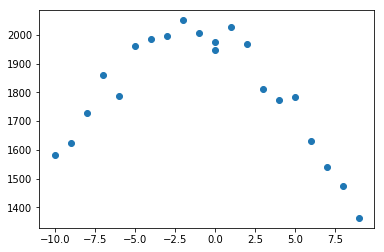

In [34]:
f,ax = plt.subplots()
ax.scatter(knobby_z,crosscorr)

In [35]:
print(knobby_z[np.argmax(crosscorr)])
# f,ax = plt.subplot(2,1,figsize=[15,10])

-2.0


In [37]:
%matplotlib qt
f,ax = plt.subplots(2,1,figsize=[15,10])
ax[0].imshow(np.squeeze(greendat).mean(axis=-1).T)
ax[1].imshow(stack[np.argmax(crosscorr),:,:])